In [111]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import scipy.stats
from icalendar import Calendar, Event
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import datetime
import ciso8601
from tqdm.notebook import tqdm
from datetime import timedelta

%matplotlib inline

In [112]:
# Definition of constants
START_DATE = '2019-03-01'
END_DATE = '2022-03-01'

In [113]:
df = pd.read_csv('dates.csv')
df['calendar'] = 0
df['inperson'] = 0
df['remote'] = 0

g = open('AcubeSAT.2.ics','rb')
gcal = Calendar.from_ical(g.read())
for component in gcal.walk():
    if component.name == "VEVENT":
        event_name = component.get('summary')
        date = component.get('dtstart').dt.strftime("%Y-%m-%d")
        df.loc[df['date'] == date, "calendar"] += 1
        location = component.get('location').lower()
        if 'discord' in location:
            df.loc[df['date'] == date, "remote"] += 1
        if 'lab' in location or 'lab ' in component.get('summary').lower() or ' lab' in component.get('summary').lower():
            df.loc[df['date'] == date, "inperson"] += 1
g.close()

df.sort_values(by='date', inplace=True, ascending=True)
df['date'] = pd.to_datetime(df['date'])

df = df[(df['date'] > START_DATE)]
# End of dates to make diagrams consistent
df = df[(df['date'] < END_DATE)]
df.rolling(window=7).mean()

mattermost  calendar  inperson  remote
1110         NaN       NaN       NaN     NaN
1109         NaN       NaN       NaN     NaN
1108         NaN       NaN       NaN     NaN
1107         NaN       NaN       NaN     NaN
1106         NaN       NaN       NaN     NaN
...          ...       ...       ...     ...
24     93.714286  3.000000       0.0     0.0
23     92.142857  4.285714       0.0     0.0
22     98.428571  3.285714       0.0     0.0
21    104.571429  3.285714       0.0     0.0
20    107.571429  3.285714       0.0     0.0

[1091 rows x 4 columns]

In [114]:
# Start of independent AcubeSAT calendar
df.loc[(df['date'] < '2020-03-07'), 'calendar'] = np.nan

# Lost Google Calendar events
df.loc[(df['date'] > '2020-05-01') & (df['date'] < '2020-08-13'), 'calendar'] = np.nan


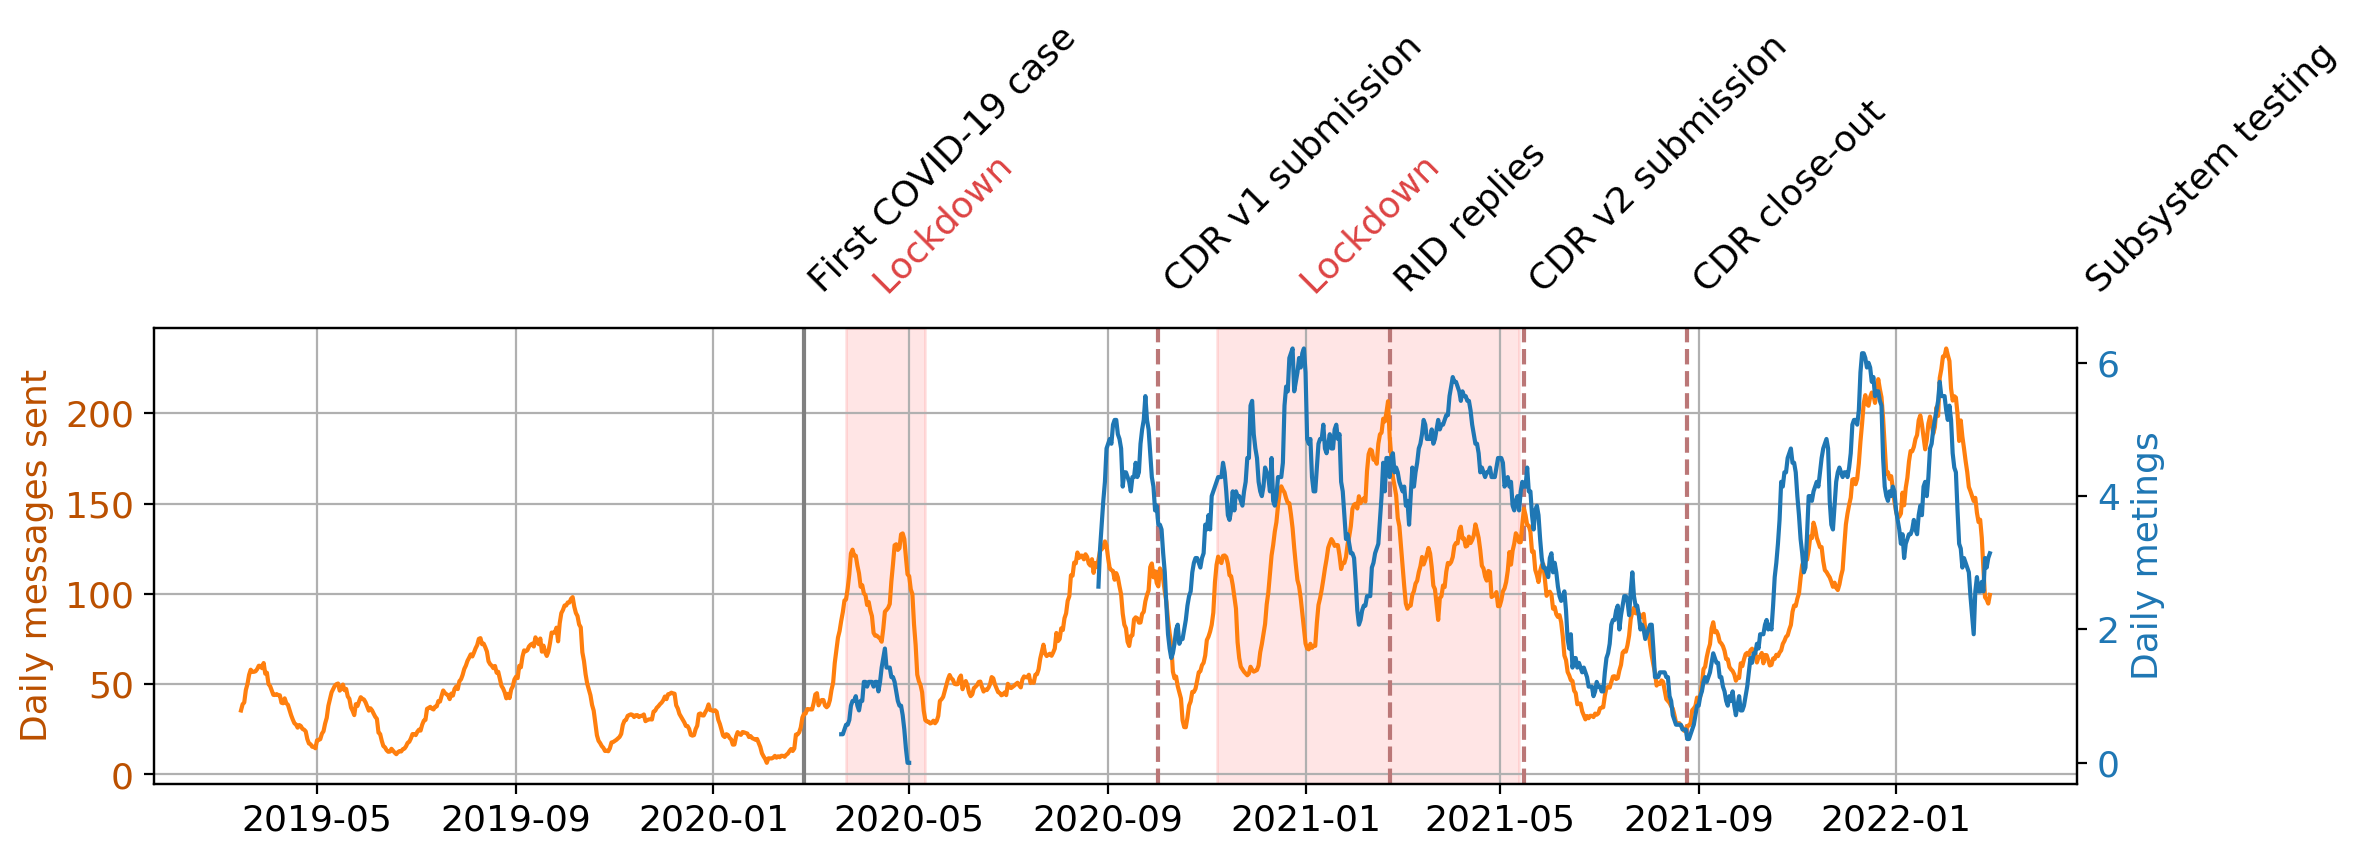

In [124]:
plt.rcParams.update({'font.size': 13})

fig,ax = plt.subplots(figsize=(12,4.5),dpi=200)

averaging = 14

plt.grid()

# Critical COVID-19 dates
plt.axvline(x=datetime.datetime(2020,2,26), color='gray')
#ax.annotate('COVID-19 arrival', (, 0), 
         #   xytext=(datetime.datetime(2020,2,26), 0), 
 #           rotation=45, va='top', arrowprops = {'width': 2, 'headwidth': 4, 'linestyle': '--'})

span = plt.axvspan(datetime.datetime(2020,3,23), datetime.datetime(2020,5,11), color='red', alpha=0.1, label='First lockdown')
span = plt.axvspan(datetime.datetime(2020,11,7), datetime.datetime(2021,5,13), color='red', alpha=0.1, label='Second lockdown')

plt.axvline(x=datetime.datetime(2020,10,2), color='#bb7777', linestyle='--')
plt.axvline(x=datetime.datetime(2021,2,22), color='#bb7777', linestyle='--')
plt.axvline(x=datetime.datetime(2021,8,25), color='#bb7777', linestyle='--')
plt.axvline(x=datetime.datetime(2021,5,16), color='#bb7777', linestyle='--')


ax.plot(df['date'].to_numpy(), df['mattermost'].rolling(averaging).mean().to_numpy(), color='C1')
ax.set_ylabel('Daily messages sent', color='#bb5000')
ax.tick_params(axis='y', labelcolor='#bb5000')

ax2=ax.twinx()
ax2.plot(df['date'].to_numpy(), df['calendar'].rolling(averaging).mean().to_numpy(), color='C0')
ax2.set_ylabel('Daily metings', color='C0')
ax2.tick_params(axis='y', labelcolor='C0')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())


#loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
ymin, ymax = ax.get_ylim()
ax.text(datetime.datetime(2020,2,26), ymax + 20, 'First COVID-19 case', rotation=45)
ax.text(datetime.datetime(2020,4,5), ymax + 20, 'Lockdown', rotation=45, color='#dd4444')
ax.text(datetime.datetime(2020,10,2), ymax + 20, 'CDR v1 submission', rotation=45)
ax.text(datetime.datetime(2021,2,22), ymax + 20, 'RID replies', rotation=45)
ax.text(datetime.datetime(2021,5,16), ymax + 20, 'CDR v2 submission', rotation=45)
ax.text(datetime.datetime(2021,8,25), ymax + 20, 'CDR close-out', rotation=45)
ax.text(datetime.datetime(2022,4,25), ymax + 20, 'Subsystem testing', rotation=45)
ax.text(datetime.datetime(2020,12,25), ymax + 20, 'Lockdown', rotation=45, color='#dd4444')

plt.subplots_adjust(top=0.7)

#plt.xticks(x, data['month'])
#plt.xlabel('Month')
#plt.ylabel('Sales')
#plt.show()

plt.tight_layout()
plt.savefig('diagram.svg')



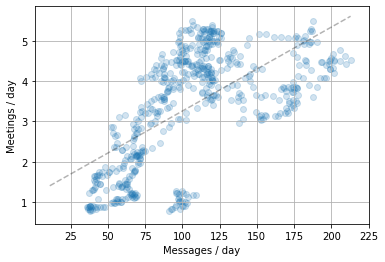

In [94]:
plt.figure()
plt.grid()

x = df['mattermost'].rolling(30).mean()
y = df['calendar'].rolling(30).mean()

plt.xlabel('Messages / day')
plt.ylabel('Meetings / day')

mask = ~np.isnan(x) & ~np.isnan(y)

coef = scipy.stats.linregress(x[mask], y[mask])
poly1d_fn = np.poly1d([coef.slope, coef.intercept])
# poly1d_fn is now a function which takes in x and returns an estimate for y

linex = np.arange(x.min(), x.max())

plt.plot(linex, poly1d_fn(linex), '--k', alpha=0.3)
plt.scatter(x, y, alpha=0.2)


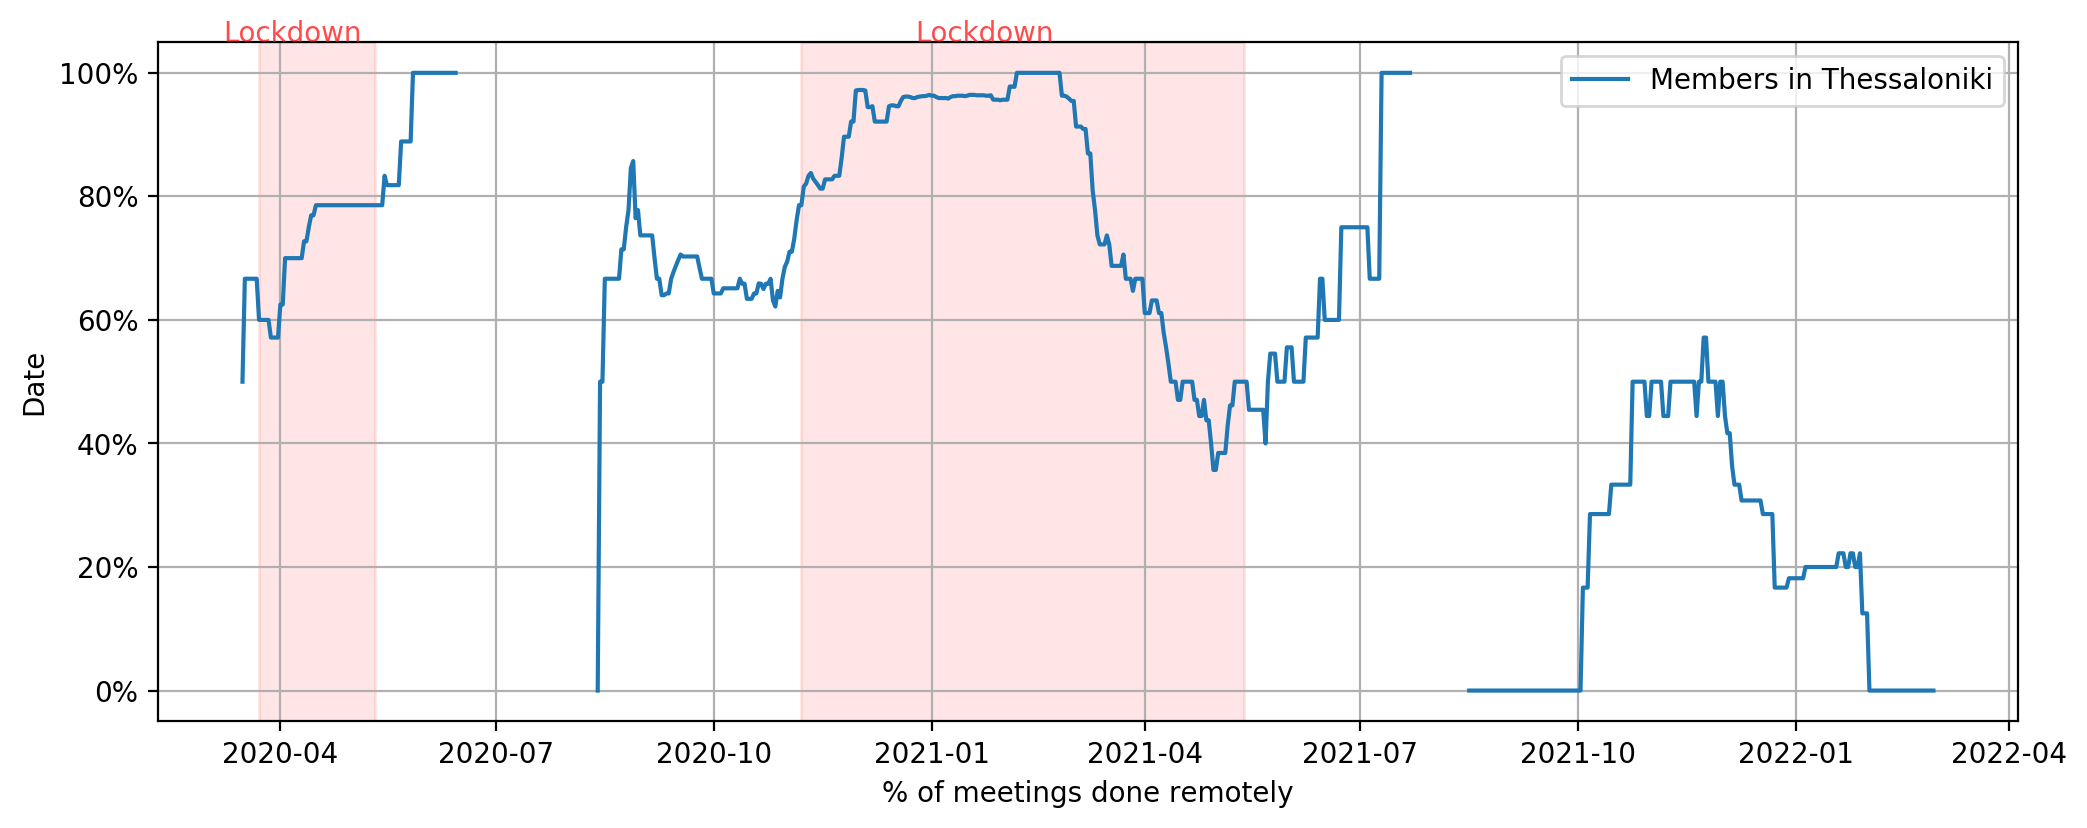

<Figure size 432x288 with 0 Axes>

In [96]:
fig,ax = plt.subplots(figsize=(12,4.5),dpi=200)

plt.grid()

averaging = 60

# Critical COVID-19 dates
# plt.axvline(x=datetime.datetime(2020,2,26), color='gray')
#ax.annotate('COVID-19 arrival', (, 0), 
         #   xytext=(datetime.datetime(2020,2,26), 0), 
 #           rotation=45, va='top', arrowprops = {'width': 2, 'headwidth': 4, 'linestyle': '--'})

span = plt.axvspan(datetime.datetime(2020,3,23), datetime.datetime(2020,5,11), color='red', alpha=0.1)
span = plt.axvspan(datetime.datetime(2020,11,7), datetime.datetime(2021,5,13), color='red', alpha=0.1)

# plt.axvline(x=datetime.datetime(2020,10,2), color='#bb7777', linestyle='--')
# plt.axvline(x=datetime.datetime(2021,2,22), color='#bb7777', linestyle='--')
# plt.axvline(x=datetime.datetime(2021,8,25), color='#bb7777', linestyle='--')
# plt.axvline(x=datetime.datetime(2021,5,16), color='#bb7777', linestyle='--')

remote_to_total = df['remote'].rolling(averaging).mean() / ((df['inperson'] + df['remote']).rolling(averaging).mean())

ax.plot(df['date'].to_numpy(), 100 * remote_to_total.to_numpy(), label='Members in Thessaloniki')
# ax.plot(df['date'].to_numpy(), df['remote'].rolling(30).mean().to_numpy(), label='Remote members')


#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())


#loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
ymin, ymax = ax.get_ylim()
# ax.text(datetime.datetime(2020,2,26), ymax + 2, 'First COVID-19 case', rotation=45)
ax.text(datetime.datetime(2020,3,8), ymax, 'Lockdown', rotation=0, color='red', alpha=0.7)
# ax.text(datetime.datetime(2020,10,2), ymax + 20, 'CDR v1 submission', rotation=45)
# ax.text(datetime.datetime(2021,2,22), ymax + 20, 'RID replies', rotation=45)
# ax.text(datetime.datetime(2021,5,16), ymax + 20, 'CDR v2 submission', rotation=45)
# ax.text(datetime.datetime(2021,8,25), ymax + 20, 'CDR close-out', rotation=45)
ax.text(datetime.datetime(2020,12,25), ymax, 'Lockdown', rotation=0, color='red', alpha=0.7)

# plt.subplots_adjust(top=0.7)

#plt.xticks(x, data['month'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.xlabel('% of meetings done remotely')
plt.ylabel('Date')
plt.show()

plt.savefig('diagram.2.svg')


## Remote / In-person member count

In [100]:
dforig = pd.read_csv('user_location.csv')

dforig.loc[:, ['firstPost','lastPost']] = dforig.loc[:, ['firstPost','lastPost']].applymap(ciso8601.parse_datetime)

dates = pd.date_range(
    start=START_DATE,
    # Remove some days from the end because many users did not post messages
    # end=(dforig['lastPost'].max() - timedelta(days=7))
    end=END_DATE
)

df = pd.DataFrame(columns=['inperson', 'remote'],index=dates)

for date in tqdm(dates):
    #df.loc[date]
    inperson = 0
    remote = 0
    for idx, user in dforig.iterrows():
        if user['firstPost'] <= date and user['lastPost'] > date:
            if user['status'] == 'inperson':
                inperson += 1
            elif user['status'] == 'remote':
                remote += 1
    
    df.loc[date] = {
        'inperson': inperson,
        'remote': remote
    }
    
print(df)

  0%|          | 0/1097 [00:00<?, ?it/s]

           inperson remote
2019-03-01       26      4
2019-03-02       26      4
2019-03-03       26      4
2019-03-04       25      4
2019-03-05       25      4
...             ...    ...
2022-02-25       55     13
2022-02-26       55     13
2022-02-27       54     13
2022-02-28       54     13
2022-03-01       54     13

[1097 rows x 2 columns]


In [101]:
window = 7
dfm = df.rolling(window=window, min_periods=(window//2), center=True).mean()
# dfm.iloc[-window//2:] = dfm.iloc[-window//2]
# dfm.iloc[:window//2] = dfm.iloc[window//2]

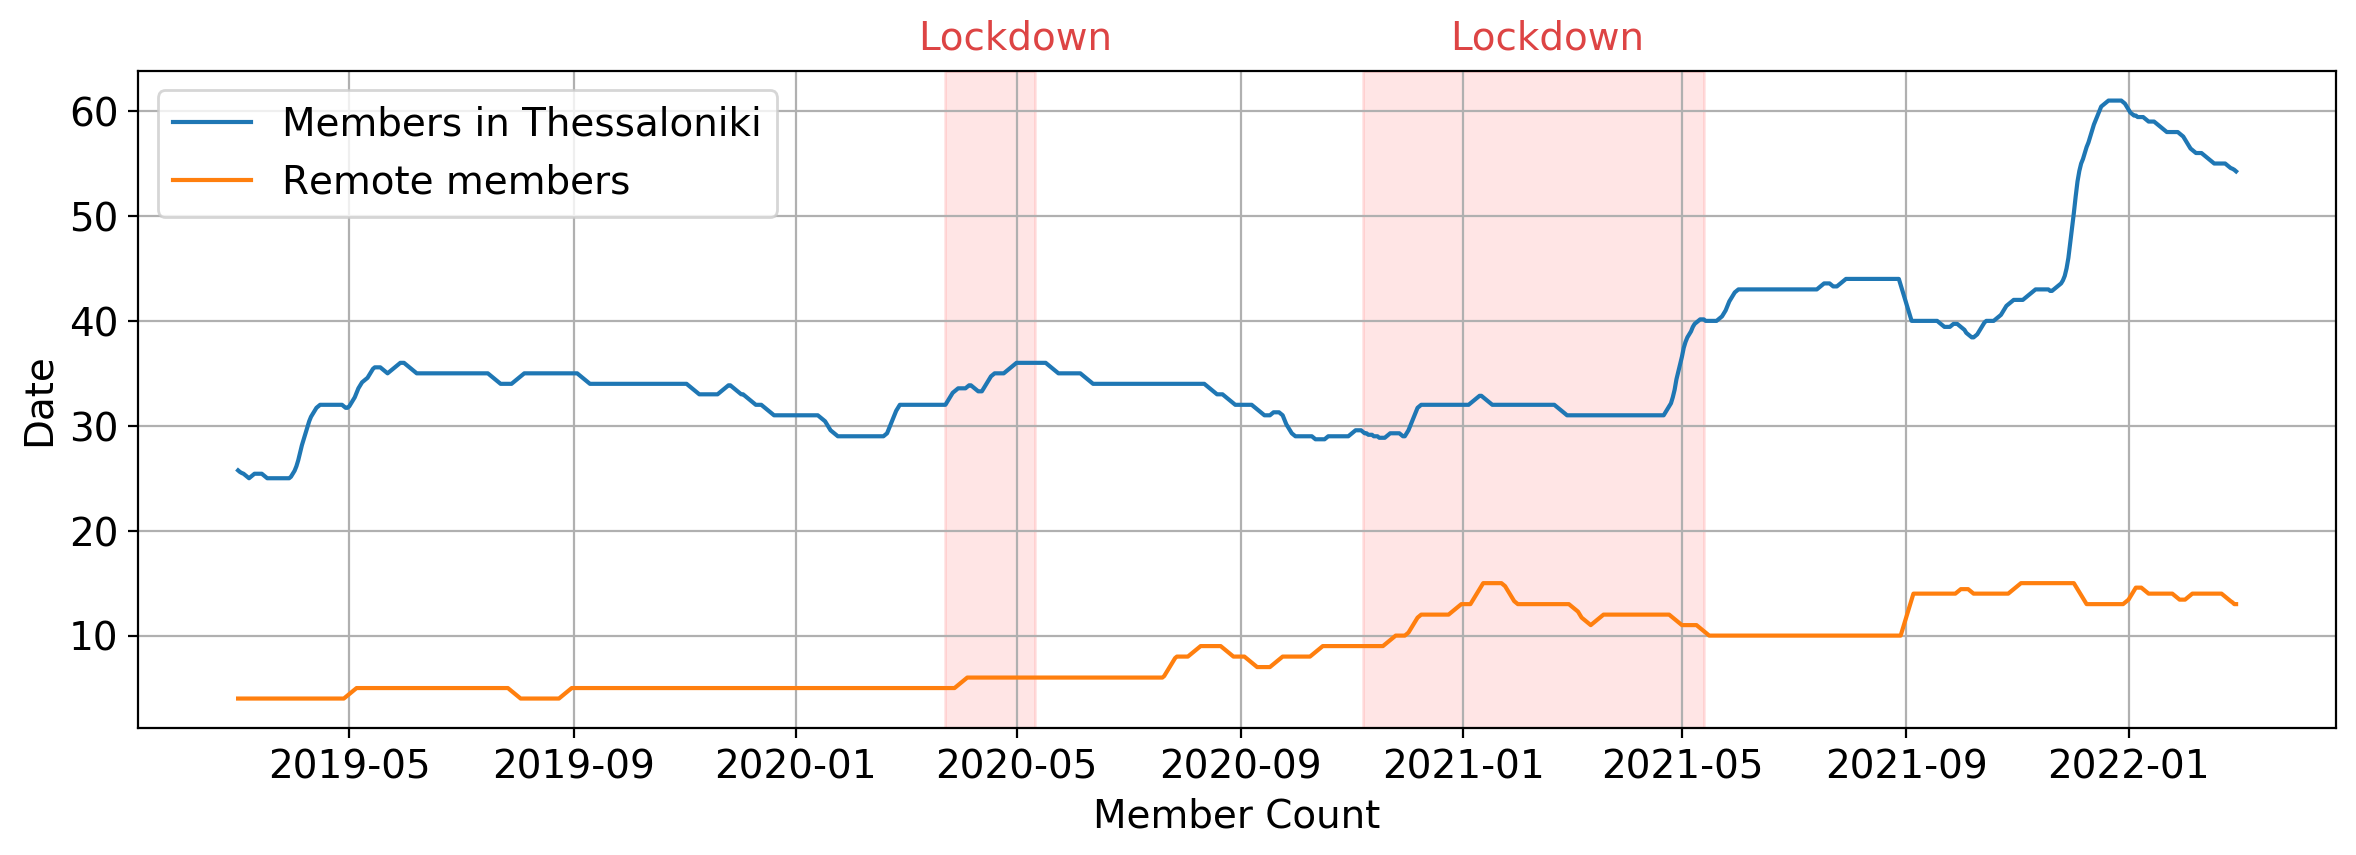

In [126]:
plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(12,4.5),dpi=200)

plt.grid()

# Critical COVID-19 dates
# plt.axvline(x=datetime.datetime(2020,2,26), color='gray')
#ax.annotate('COVID-19 arrival', (, 0), 
         #   xytext=(datetime.datetime(2020,2,26), 0), 
 #           rotation=45, va='top', arrowprops = {'width': 2, 'headwidth': 4, 'linestyle': '--'})

span = plt.axvspan(datetime.datetime(2020,3,23), datetime.datetime(2020,5,11), color='red', alpha=0.1)
span = plt.axvspan(datetime.datetime(2020,11,7), datetime.datetime(2021,5,13), color='red', alpha=0.1)

# plt.axvline(x=datetime.datetime(2020,10,2), color='#bb7777', linestyle='--')
# plt.axvline(x=datetime.datetime(2021,2,22), color='#bb7777', linestyle='--')
# plt.axvline(x=datetime.datetime(2021,8,25), color='#bb7777', linestyle='--')
# plt.axvline(x=datetime.datetime(2021,5,16), color='#bb7777', linestyle='--')


ax.plot(dfm.index.to_numpy(), dfm['inperson'].to_numpy(), label='Members in Thessaloniki')
ax.plot(dfm.index.to_numpy(), dfm['remote'].to_numpy(), label='Remote members')


#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())


#loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
ymin, ymax = ax.get_ylim()
# ax.text(datetime.datetime(2020,2,26), ymax + 2, 'First COVID-19 case', rotation=45)
ax.text(datetime.datetime(2020,3,8), ymax + 2, 'Lockdown', rotation=0, color='#dd4444')
# ax.text(datetime.datetime(2020,10,2), ymax + 20, 'CDR v1 submission', rotation=45)
# ax.text(datetime.datetime(2021,2,22), ymax + 20, 'RID replies', rotation=45)
# ax.text(datetime.datetime(2021,5,16), ymax + 20, 'CDR v2 submission', rotation=45)
# ax.text(datetime.datetime(2021,8,25), ymax + 20, 'CDR close-out', rotation=45)
ax.text(datetime.datetime(2020,12,25), ymax + 2, 'Lockdown', rotation=0, color='#dd4444')

# plt.subplots_adjust(top=0.7)

#plt.xticks(x, data['month'])
plt.legend()
plt.xlabel('Member Count')
plt.ylabel('Date')
#plt.show()

plt.tight_layout()
plt.savefig('diagram.2.svg')
